In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Reshape, Dense, Dropout, LeakyReLU, Flatten, BatchNormalization, Conv2D, Conv2DTranspose


In [2]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [3]:
from pathlib import Path


In [4]:
TrainingImagePath='Face-Images/Final Training Images'
TestingImagePath = 'Face-Images/Final Testing Images'


In [5]:
type(str(TrainingImagePath))

str

In [6]:
face = Path(TestingImagePath + '/lasya' + '/opencv_frame_47.png')

In [7]:
face_img= imread(face)

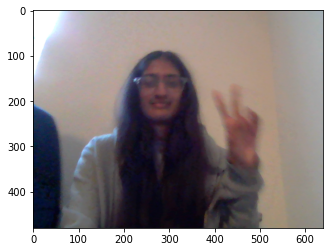

In [8]:
plt.imshow(face_img)

In [9]:
face_img.shape

(480, 640, 3)

In [10]:
classes = sum(os.path.isdir(os.path.join(TrainingImagePath,i)) for i in os.listdir(TrainingImagePath))



In [11]:
image_shape = (80,80,3)

In [12]:
resized = cv2.resize(face_img, (80,80), interpolation = cv2.INTER_AREA)

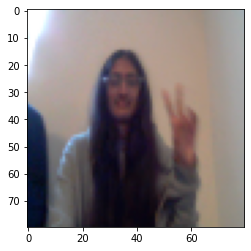

In [13]:
plt.imshow(resized)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [16]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [17]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
def Jose():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

#     model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Conv2D(filters=256, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
    
#     model.add(Conv2D(filters=512, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
#     model.add(Dropout(0.1))

    # Last layer, remember its binary so we use sigmoid
    model.add(Dense(classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
   
    return model

In [18]:
model = Jose()

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20736)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [20]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()

# Generating the Training Data
training_set = image_gen.flow_from_directory(
        TrainingImagePath,
        target_size=(80, 80),
        batch_size=32,
        class_mode='categorical',shuffle=True)


# Generating the Testing Data
test_set = image_gen.flow_from_directory(
        TestingImagePath,
        target_size=(80, 80),
        batch_size=32,
        class_mode='categorical')

Found 51 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [21]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop]
                             )

Epoch 1/20
2/2 [==============================] - 1s 728ms/step - loss: 3.5545 - accuracy: 0.3333 - val_loss: 2.5168 - val_accuracy: 0.3333
Epoch 2/20
2/2 [==============================] - 1s 461ms/step - loss: 1.6313 - accuracy: 0.3333 - val_loss: 1.0391 - val_accuracy: 0.3333
Epoch 3/20
2/2 [==============================] - 1s 400ms/step - loss: 1.0569 - accuracy: 0.3333 - val_loss: 1.0803 - val_accuracy: 0.3333
Epoch 4/20
2/2 [==============================] - 1s 542ms/step - loss: 1.0882 - accuracy: 0.3333 - val_loss: 1.0181 - val_accuracy: 0.3333
Epoch 5/20
2/2 [==============================] - 1s 333ms/step - loss: 1.0295 - accuracy: 0.4510 - val_loss: 1.0234 - val_accuracy: 0.3333
Epoch 6/20
2/2 [==============================] - 1s 502ms/step - loss: 1.0105 - accuracy: 0.5098 - val_loss: 0.9426 - val_accuracy: 0.5833
Epoch 7/20
2/2 [==============================] - 1s 319ms/step - loss: 0.9701 - accuracy: 0.5294 - val_loss: 0.9009 - val_accuracy: 0.6667
Epoch 8/20
2/2 [====

In [ ]:
# # %load ('face_cnn_latest_best.h5')
# import tensorflow as tf
# model = tf.keras.models.load_model('face_cnn_latest_best.h5')

In [22]:
import keras.utils as image

In [23]:
def pred(para_path):
    para_img = image.load_img(para_path,target_size=image_shape)
    plt.imshow(para_img)
    para_img=  image.img_to_array(para_img)
    para_img = para_img/255
    para_img = np.expand_dims(para_img,axis=0)
    result = model.predict(para_img).argmax()

    for a,b in training_set.class_indices.items():
        if b == result:
            print("The person is", a)
    return result
    

In [30]:
model.save('best_model_so_far.h5')

In [24]:
folders = []
for i in os.listdir(TestingImagePath):
    if os.path.isdir(os.path.join(TestingImagePath,i)):
        folders.append(i)

opencv_frame_0.png
1/1 [==============================] - 0s 90ms/step
The person is kartik
opencv_frame_11.png
1/1 [==============================] - 0s 26ms/step
The person is kartik
opencv_frame_12.png
1/1 [==============================] - 0s 26ms/step
The person is kartik
opencv_frame_3.png
1/1 [==============================] - 0s 25ms/step
The person is kartik
opencv_frame_10.png
1/1 [==============================] - 0s 31ms/step
The person is lasya
opencv_frame_30.png
1/1 [==============================] - 0s 29ms/step
The person is lasya
opencv_frame_38.png
1/1 [==============================] - 0s 28ms/step
The person is lasya
opencv_frame_47.png
1/1 [==============================] - 0s 28ms/step
The person is lasya
soumyo_15.png
1/1 [==============================] - 0s 33ms/step
The person is soumyo
soumyo_16.png
1/1 [==============================] - 0s 29ms/step
The person is soumyo
soumyo_17.png
1/1 [==============================] - 0s 34ms/step
The person is soumyo
s

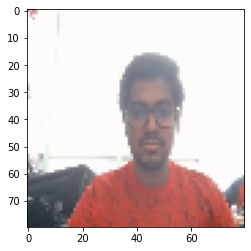

In [25]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))
            
    

1/1 [==============================] - 0s 24ms/step
The person is lasya


1

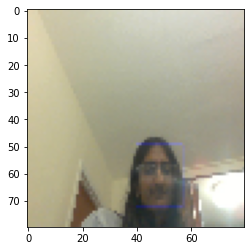

In [31]:
path = r'C:\Users\lasya\OneDrive\Desktop\Masters\Deep learning\project\Deep-Learning-Project\opencv100.jpg'
pred(path)

In [ ]:
path = r'C:\Users\lasya\OneDrive\Desktop\Masters\Deep learning\project\Deep-Learning-Project\Face-Images\Final Testing Images\soumyo'

In [ ]:
for i in os.listdir(path):
    print(pred(f'{path}\\{i}'))

In [26]:
print(classification_report(test_set.classes,pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
def pre_trained():
    model = Sequential()

    model.add(ResNet50(include_top=False,pooling ='avg',weights='imagenet'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.layers[0].trainable = True
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model
    

In [ ]:
moodel = pre_trained()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
folders = []
for i in os.listdir(TestingImagePath):
    if 'face' in i:
        folders.append(i)

In [ ]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))
            

In [ ]:
print(classification_report(test_set.classes,pre))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
def pre_trained_VGG():
    model = Sequential()

    model.add(VGG16(include_top=False,pooling ='avg',weights='imagenet'))
    model.add(Dense(512,activation='relu'))
    model.add(Dense(16,activation='softmax'))
    model.layers[0].trainable = True
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    return model

In [ ]:
model = pre_trained_VGG()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
folders = []
for i in os.listdir(TestingImagePath):
    if 'face' in i:
        folders.append(i)

In [ ]:
pre = []
for i in folders:

    for j in os.listdir(TestingImagePath + "\\" + i + "\\"):
        print(j)
        p = (TestingImagePath +'\\' + i +'\\'+j)
        pre.append(pred(p))

In [ ]:
print(classification_report(test_set.classes,pre))

In [ ]:
def AutoEncoder():
    encoder = Sequential()

    
    #encoder.add(Dense(315*315*3,input_shape = (315,315,3) ,activation='relu'))
    #encoder.add(Reshape([315,315,3]))
    #encoder.add(BatchNormalization())
    encoder.add(Flatten(input_shape = (315,315,3)))
    encoder.add(Dense(105,activation='relu'))
    encoder.add(Dense(35,activation='relu'))
    
   
   
    
    decoder = Sequential()

    decoder.add(Dense(105,activation='relu',input_shape = [35]))
    decoder.add(Dense(315*315*3,activation='relu'))
    decoder.add(Dense(16,activation='softmax'))
    
    
    model = Sequential([encoder,decoder])
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
    
    
    
    
    return model, encoder, decoder

In [ ]:
a,b,c = AutoEncoder()

In [ ]:
b.summay()

In [ ]:
a.summary()

In [ ]:
c.summary()

In [ ]:
results = a.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def face_rec():
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(315, 315, 3)))
    model.add(BatchNormalization()) #----------------
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization()) #----------------
    model.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization()) #----------------
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) #----------------

    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=5, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Dense(16, activation='softmax'))
    
    optimizer = RMSprop(lr=0.001)

    model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    
    return model

In [ ]:
model = face_rec()

In [ ]:
results = model.fit_generator(training_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
def Basic():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())


    model.add(Dense(128))
    model.add(Activation('relu'))

    # Dropouts help reduce overfitting by randomly turning neurons off during training.
    # Here we say randomly turn off 50% of neurons.
    model.add(Dropout(0.1))

    # Last layer, remember its binary so we use sigmoid
    model.add(Dense(16))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
   
    return model

In [ ]:
model = Basic()

In [ ]:
model.summary()

In [ ]:
results = model.fit_generator(training_set,epochs=40,
                              validation_data=test_set,
                             callbacks=[early_stop])

In [ ]:
df = pd.DataFrame(results.history)

In [ ]:
df[['loss','val_loss']].plot()

In [ ]:
df[['accuracy','val_accuracy']].plot()